# Linear Algebra in Data Science
# Project Done by Jimy Salem & Mohammad Masarra 

One of the most used principles in Data Science rising from linear algebra is PCA

PCA stands for principal component analysis which is a dimensionality reduction method used for large set

It is done using the following methods:
 1. Standarize a  dataset
 2. Computing the covariance matrix
 3. Computing the eigenvalues and eigenvectors
 4. Deciding the principal components to keep
 5. Recast data along the principal components axes
 
 ### The goal:
 
The goal of PCA is to reduce the dimensionality of the data from 4 features to 2 features, so that we can visualize the dataset while preserving as much variance as possible

# a. Import the data set

The data set is a random data set which takes 50 fighters with information of age, weight, height, training time/week, and we are going to apply 
PCA on this simple dataset to reduce the number of features so that we can visualize the dataset

In [25]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"Random_DataSet.csv")
df.head()

,age,weight,height,training time,number of wins
0,25,119,194,27,5
1,30,92,190,24,6
2,23,83,194,49,10
3,29,94,177,24,9
4,28,87,178,54,1


In [33]:
# checking if the dataset contain null values
df.isnull().sum()

age               0
weight            0
height            0
training time     0
number of wins    0
dtype: int64

In [28]:
df1 = df.copy
df1 = df[["age","weight","height","training time"]]

df1.head()

,age,weight,height,training time
0,25,119,194,27
1,30,92,190,24
2,23,83,194,49
3,29,94,177,24
4,28,87,178,54


## b. Standarize the data

##### standardize means centering data around zero so that mean of each feature is 0, we do standardize to ensure that 
##### features with large values do not dominate features with small values

In [38]:
# first step in PCA is to standarize the data, for this reason we gonna use StandardScaler from Scikit-learn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = scaler.fit_transform(df1)

df2 = pd.DataFrame(x, columns = df1.columns)
df2.head()

,age,weight,height,training time
0,-0.992044,1.817220,1.354893,-0.841408
1,0.930521,0.186072,0.930827,-1.076877
2,-1.761070,-0.357644,1.354893,0.885362
3,0.546008,0.306898,-0.447390,-1.076877
4,0.161495,-0.115993,-0.341374,1.277810


In [9]:
x_cov_matrix = np.cov (np.transpose(x_scaled))

In [10]:
print(x_cov_matrix)

[[ 1.02040816  0.0707885  -0.13092989 -0.08245984]
 [ 0.0707885   1.02040816  0.01240174 -0.11071772]
 [-0.13092989  0.01240174  1.02040816 -0.21480932]
 [-0.08245984 -0.11071772 -0.21480932  1.02040816]]


# 3. Computing the eigenvalues and eigenvectors

In [11]:
import numpy.linalg as np

In [53]:
eigenvalues, eigenvectors = np.linalg.eig (x_cov_matrix)

In [54]:
print (f"The eigenvalues are: {eigenvalues}")
print (f"The eigenvectors are: {eigenvectors}")

The eigenvalues are: [0.7245605  0.93232037 1.15747346 1.26727832]
The eigenvectors are: [[-0.43320969  0.49791742 -0.75127007 -0.00095005]
 [-0.10334979 -0.80400317 -0.47283512 -0.34543405]
 [-0.64115554  0.09590333  0.43406632 -0.6255466 ]
 [-0.62495421 -0.31057963  0.15364462  0.6995469 ]]


## a. Ordering the eigenvalues and eigenvectors

Ordering eigenvalues (and their corresponding eigenvectors) in descending order is a critical step in Principal Component Analysis (PCA) and other eigenvalue problems. This is because the magnitude of each eigenvalue corresponds to the amount of variance that the principal component (eigenvector) captures from the data

In [56]:
ordered_eigenvalues = eigenvalues[::-1]
ordered_eigenvectors = eigenvectors[::-1]
print (f"eigen values {ordered_eigenvalues}")
print (f"eigen vectors {ordered_eigenvectors}")

eigen values [1.26727832 1.15747346 0.93232037 0.7245605 ]
eigen vectors [[-0.62495421 -0.31057963  0.15364462  0.6995469 ]
 [-0.64115554  0.09590333  0.43406632 -0.6255466 ]
 [-0.10334979 -0.80400317 -0.47283512 -0.34543405]
 [-0.43320969  0.49791742 -0.75127007 -0.00095005]]


## b. Get the percentage they represent

In [60]:
percentage = []
sum_value = sum(ordered_eigenvalues)
for i in ordered_eigenvalues:
    percentage.append (100*(i/sum_value))

In [16]:
print (percentage)

[31.04831882393681, 28.35809987907304, 22.84184904500862, 17.751732251981522]


In [68]:
df2.shape

(50, 4)

Then the first eigenvalue represent 31.04% of the data

The second represent 28.35%

we will use the first two eigenvalues that represent 59.39% of the data

In [72]:
principal_components = ordered_eigenvectors[0:2,:]
transformed_data = np.dot(df2, principal_components.T)

transformed_data.shape

(50, 2)

## Visualising Data

<function matplotlib.pyplot.show(close=None, block=None)>

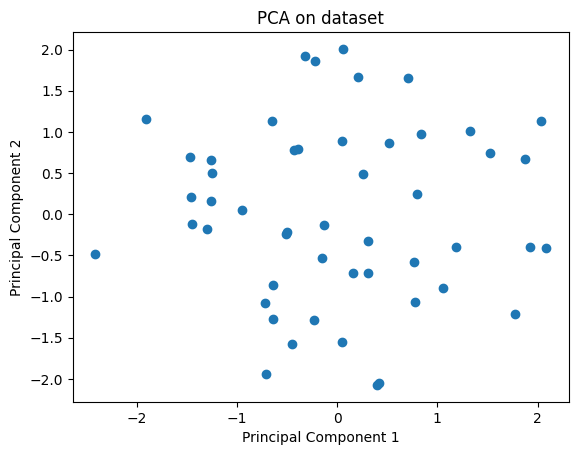

In [73]:
from matplotlib import pyplot as plt

plt.scatter(transformed_data[:,0], transformed_data[:,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on dataset')
plt.show